<a href="https://colab.research.google.com/github/juliano-echo21/MetNumUN2024l/blob/main/Lab2/jurinconor_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[COLAB para pruebas](https://colab.research.google.com/drive/1qzHB6zkRipmOstZFOQF_oZE9OrAs6HhV?usp=sharing)

In [ ]:
pip install fortran-magic

In [ ]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00',
                             '2017-01-07 00:00:00+00:00',
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [ ]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: unhashable type: 'slice'

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
4 * "a"

'aaaa'

In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

CPU times: user 38 µs, sys: 0 ns, total: 38 µs
Wall time: 42.7 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 0 - cpu info**

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
addres

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [ ]:
matmul(a,b)

IndexError: list index out of range

**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    if len(A[0]) != len(B):
      raise Exception("Matrices not compatible")

    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
matmul(a, b)

IndexError: list index out of range

**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [ ]:
a = [[1, 2], [3, 4]]
b = [[1, 2], [3, 4]]

**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [ ]:
%%time
matmul(a, b)

CPU times: user 19 µs, sys: 3 µs, total: 22 µs
Wall time: 26.5 µs


[[7, 10], [15, 22]]

In [ ]:
import random

In [ ]:
random.normalvariate(0,1)

-1.3850832046820645

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.1048716562147699, 0.7409669799010621, 0.5525008760245484],
 [0.6324680602927735, 0.6357256878298962, 0.9490335895383719]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [ ]:
import time
tot = 0
for i in range(11):
  a, b = random_matrix(600, 100), random_matrix(100, 600)
  st = time.perf_counter()
  matmul(a, b)
  en = time.perf_counter()
  if i > 0:
    tot += en-st
print(tot/10)

9.527191515900018


**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [ ]:
import pandas as pd

df = pd.DataFrame({"Lang": ["Python"], "Avg Time": [tot/10]})

**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [ ]:
import time
import numpy as np
tot = 0
for i in range(11):
  a, b = np.array(random_matrix(600, 100)), np.array(random_matrix(100, 600))
  st = time.perf_counter()
  a @ b
  en = time.perf_counter()
  if i > 0:
    tot += en-st
print(tot/10)

0.003020332299990969


In [ ]:
df = df.append({"Lang": "Numpy", "Avg Time": tot/10}, ignore_index=True)

<ipython-input-62-c202bdd15e2f>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"Lang": "Numpy", "Avg Time": tot/10}, ignore_index=True)


In [ ]:
df

,Lang,Avg Time
0,Python,9.527192
1,Numpy,0.003020


In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 9.55 s, sys: 43.7 ms, total: 9.59 s
Wall time: 9.72 s


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result

    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 15.5 ms, sys: 0 ns, total: 15.5 ms
Wall time: 20.9 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 186 µs, sys: 2 µs, total: 188 µs
Wall time: 195 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [ ]:
import numpy as np
a, b = np.array([[1.0, 2.0], [1.0, 2.0]]), np.array([[1.0, 2.0], [1.0, 2.0]])

**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [ ]:
%%fortran
subroutine matrix_multiply(a, b, c)
    double precision, intent(in) :: a(2,2), b(2,2)
    double precision, intent(out) :: c(2,2)
    integer :: i, j, k

    do i = 1, 2
        do j = 1, 2
            c(i,j) = 0.0
            do k = 1, 2
                c(i,j) = c(i,j) + a(i,k) * b(k,j)
            end do
        end do
    end do

end subroutine matrix_multiply

**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [ ]:
%%time
matrix_multiply(a, b)

CPU times: user 1.76 ms, sys: 0 ns, total: 1.76 ms
Wall time: 2.79 ms


array([[3., 6.],
       [3., 6.]])

In [ ]:
a@b

array([[3., 6.],
       [3., 6.]])

**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [ ]:
%%fortran
subroutine matrix_multiply_n_m(a, b, c, n, m, p)
    integer, intent(in) :: n, m, p
    double precision, intent(in) :: a(n,m), b(m,p)
    double precision, intent(out) :: c(n,p)
    integer :: i, j, k

    do i = 1, n
        do j = 1, p
            c(i,j) = 0.0
            do k = 1, m
                c(i,j) = c(i,j) + a(i,k) * b(k,j)
            end do
        end do
    end do

end subroutine matrix_multiply_n_m

**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [ ]:
a, b = np.array(random_matrix(600, 100)), np.array(random_matrix(100, 600))

In [ ]:
%%time
matrix_multiply_n_m(a, b, 600, 100, 600)

CPU times: user 45.1 ms, sys: 2.02 ms, total: 47.1 ms
Wall time: 50.2 ms


array([[26.06723002, 26.52518999, 25.20128806, ..., 26.09335404,
        26.68543541, 25.94398875],
       [25.46276125, 26.8318056 , 26.9848115 , ..., 26.04164725,
        27.25955998, 26.36772383],
       [24.62737654, 24.8737852 , 24.20150135, ..., 24.53143497,
        26.06561761, 25.15997304],
       ...,
       [27.38237226, 27.55539731, 26.62647258, ..., 27.04120151,
        27.65429619, 27.41791211],
       [29.44234777, 30.7709042 , 29.02064208, ..., 28.76610526,
        29.50083549, 28.19150011],
       [23.22182786, 23.23854427, 23.71262701, ..., 23.11789013,
        24.68618883, 24.46920661]])

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [ ]:
import time
import numpy as np
tot = 0
for i in range(11):
  a, b = np.array(random_matrix(600, 100)), np.array(random_matrix(100, 600))
  st = time.perf_counter()
  matrix_multiply_n_m(a, b, 600, 100, 600)
  en = time.perf_counter()
  if i > 0:
    tot += en-st
print(tot/10)

0.04520367930001612


In [ ]:
df = df.append({"Lang": "Fortran Magic", "Avg Time": tot/10}, ignore_index=True)

<ipython-input-78-79d19183452e>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"Lang": "Fortran Magic", "Avg Time": tot/10}, ignore_index=True)


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%file fortran_matrix_multiply.f90
program matrix_multiplication
  integer :: n = 600, m = 100, p = 600
  double precision :: a(600,100), b(100,600), c(600,600)

  integer :: i, j, k

  real :: tot, start, end
  integer :: r

  do i = 1, n
    do j = 1, m
      a(i,j) = (i + j) * 0.5
      b(i,j) = (i - j) * 0.5
    end do
  end do

  tot = 0.0
  do r = 1, 10
    call cpu_time(start)
    c = matmul(a, b)
    call cpu_time(end)
    tot = tot + (end-start)
  end do

  tot = tot/10.0

  PRINT *,tot

end program matrix_multiplication

Writing fortran_matrix_multiply.f90


In [ ]:
!gfortran fortran_matrix_multiply.f90 -o fortran_matrix_multiply

**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
fortran_avg_time = !./fortran_matrix_multiply
print(fortran_avg_time)
fortran_avg_time = eval(fortran_avg_time[-1].strip())
print(fortran_avg_time)

['   6.66279951E-03']
0.00666279951


**My own example 18 - Adding Fortran average execution time to the data frame**

In [ ]:
df = df.append({"Lang": "Fortran", "Avg Time": fortran_avg_time}, ignore_index=True)

<ipython-input-82-59590990a5ae>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"Lang": "Fortran", "Avg Time": fortran_avg_time}, ignore_index=True)


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%file c_matrix_multiply.c
#include <stdio.h>
#include <stdlib.h>
#include <time.h>

int** buildMatrix(int n, int m){
    int **arr = malloc(n*sizeof(int *));

    for(int i = 0; i < n; i++){
        arr[i] = malloc(m*sizeof(int));
    }

    return arr;
}

int main(){
    clock_t start, end;
    double cpu_time_used;

    int **a = buildMatrix(600, 100);
    int **b = buildMatrix(100, 600);
    int **c = buildMatrix(600, 600);

    for(int i = 0; i < 600; i++){
        for(int j = 0; j < 100; j++){
            a[i][j] = i+j;
            b[j][i] = i-j;
        }
    }

    for(int i = 0; i < 600; i++)
        for(int j = 0; j < 600; j++)
            c[i][j] = 0;

    start = clock();
    for(int r = 0; r < 10; r++)
      for(int i = 0; i < 600; i++)
          for(int j = 0; j < 600; j++)
              for(int k = 0; k < 100; k++)
                  c[i][j] += a[i][k] * b[k][j];

    end = clock();

    cpu_time_used = ((double) (end - start)) / CLOCKS_PER_SEC;
    cpu_time_used /= 10;

    printf("%f", cpu_time_used);

    return 0;
}

Writing c_matrix_multiply.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!gcc c_matrix_multiply.c -o c_matrix_multiply

In [ ]:
c_avg_time = !./c_matrix_multiply
print(c_avg_time)
c_avg_time = eval(c_avg_time[-1].strip())
print(c_avg_time)

['0.217402']
0.217402


**My own example 21 - Adding c average execution time to the data frame**

In [ ]:
df = df.append({"Lang": "C", "Avg Time": c_avg_time}, ignore_index=True)

<ipython-input-86-bf1920e1bb57>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"Lang": "C", "Avg Time": c_avg_time}, ignore_index=True)


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%file cpp_matrix_multiply.cpp
#include<bits/stdc++.h>
#include <chrono>

#define N 600
#define M 100
#define P 600

using namespace std;



int main(){
    int a[N][M], b[M][P], c[N][P];
    memset(c, 0, sizeof(c));

    for(int i = 0; i < N; i++){
        for(int j = 0; j < M; j++){
            a[i][j] = i+j;
            b[j][i] = i-j;
        }
    }

    auto start = chrono::high_resolution_clock::now();
    for(int r = 0; r < 10; r++)
      for(int i = 0; i < N; i++)
        for(int j = 0; j < P; j++)
          for(int k = 0; k < M; k++)
            c[i][j] += a[i][k] * b[k][j];
    auto end = chrono::high_resolution_clock::now();
    chrono::duration<double> dur = end-start;

    printf("%f", dur.count()/10);

    return 0;
}

Writing cpp_matrix_multiply.cpp


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!g++ cpp_matrix_multiply.cpp -o cpp_matrix_multiply -std=c++20 -O3 -march=native -mtune=native -flto -finline-functions -funroll-loops

In [ ]:
cpp_avg_time = !./cpp_matrix_multiply
print(cpp_avg_time)
cpp_avg_time = eval(cpp_avg_time[-1].strip())
print(cpp_avg_time)

['0.004837']
0.004837


**My own example 24 - Adding C++ average execution time to the data frame**

In [ ]:
df = df.append({"Lang": "CPP", "Avg Time": cpp_avg_time}, ignore_index=True)

<ipython-input-90-a029c37945a7>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"Lang": "CPP", "Avg Time": cpp_avg_time}, ignore_index=True)


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%file MatrixMultiplication.java

public class MatrixMultiplication {
    public static void main(String[] args) {
        int[][] A = new int[600][100];
        int[][] B = new int[100][600];
        int[][] C = new int[600][600]; // Resultado de AxB

        // Inicialización de matrices con valores de ejemplo
        for(int i = 0; i < 600; i++) {
            for(int j = 0; j < 100; j++) {
                A[i][j] = 1; // Valor ejemplo para A
            }
        }

        for(int i = 0; i < 100; i++) {
            for(int j = 0; j < 600; j++) {
                B[i][j] = 2; // Valor ejemplo para B
            }
        }

        long startTime = System.nanoTime();

        // Realizar la multiplicación 10 veces
        for(int times = 0; times < 10; times++) {
            for(int i = 0; i < 600; i++) {
                for(int j = 0; j < 600; j++) {
                    C[i][j] = 0;
                    for(int k = 0; k < 100; k++) {
                        C[i][j] += A[i][k] * B[k][j];
                    }
                }
            }
        }

        long endTime = System.nanoTime();
        long duration = (endTime - startTime) / 10; // Tiempo promedio por multiplicación

        System.out.println("Tiempo promedio de ejecución: " + duration + " nanosegundos");
    }
}


Writing MatrixMultiplication.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!javac MatrixMultiplication.java
!java MatrixMultiplication



Tiempo promedio de ejecución: 84709525 nanosegundos


**My own example 27 - Adding Java average execution time to the data frame**

In [ ]:
import pandas as pd
import subprocess

# Suponiendo que el DataFrame ya está inicializado
# df = pd.DataFrame(columns=["Lang", "Avg Time"])

# Ejecutando el programa Java y capturando la salida
result = subprocess.run(['java', 'MatrixMultiplication'], stdout=subprocess.PIPE)
java_output = result.stdout.decode('utf-8')
java_avg_time = int(java_output.split()[-2]) # Ajusta esto según sea necesario para extraer el tiempo

# Añadiendo al DataFrame
df = df.append({"Lang": "Java", "Avg Time": java_avg_time}, ignore_index=True)


<ipython-input-93-c9bc8118fdfa>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"Lang": "Java", "Avg Time": java_avg_time}, ignore_index=True)


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile matrix.js
const N = 600;
const M = 100;
const P = 600;

function initializeMatrix(rows, cols) {
    const matrix = new Array(rows);
    for (let i = 0; i < rows; i++) {
        matrix[i] = new Array(cols);
    }
    return matrix;
}

function matrixMultiply(a, b, c) {
    for (let i = 0; i < N; i++) {
        for (let j = 0; j < P; j++) {
            c[i][j] = 0;
            for (let k = 0; k < M; k++) {
                c[i][j] += a[i][k] * b[k][j];
            }
        }
    }
}

const a = initializeMatrix(N, M);
const b = initializeMatrix(M, P);
const c = initializeMatrix(N, P);

for (let i = 0; i < N; i++) {
    for (let j = 0; j < M; j++) {
        a[i][j] = i + j;
        b[j][i] = i - j;
    }
}

const start = Date.now();
for (let r = 0; r < 10; r++) {
    matrixMultiply(a, b, c);
}
const end = Date.now();
const duration = (end - start) / 1000;

console.log(duration / 10);


Writing matrix.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
import re
js_avg_time = !node matrix.js
js_avg_time = float(re.sub(r'\x1b\[\d+m', '', js_avg_time[0]))
print(js_avg_time)

0.331


**My own example 30 - Adding Javascript average execution time to the data frame**

In [ ]:
df = df.append({"Lang": "Javascript", "Avg Time": js_avg_time}, ignore_index=True)

<ipython-input-96-8c4434f88f17>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"Lang": "Javascript", "Avg Time": js_avg_time}, ignore_index=True)


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [ ]:
df

,Lang,Avg Time
0,Python,9.527192e+00
1,Numpy,3.020332e-03
2,Fortran Magic,4.520368e-02
3,Fortran,6.662800e-03
4,C,2.174020e-01
5,CPP,4.837000e-03
6,Java,5.208458e+07
7,Javascript,3.310000e-01


In [ ]:
df.nsmallest(1, "Avg Time")

,Lang,Avg Time
1,Numpy,0.00302


**My own example 32 - Adding the Speed factor columne to the data frame**

In [ ]:
min_speed = np.amin(df["Avg Time"])
df["Speed Factor"] = df["Avg Time"] / min_speed

In [ ]:
df

,Lang,Avg Time,Speed Factor
0,Python,9.527192e+00,3.154352e+03
1,Numpy,3.020332e-03,1.000000e+00
2,Fortran Magic,4.520368e-02,1.496646e+01
3,Fortran,6.662800e-03,2.205982e+00
4,C,2.174020e-01,7.197950e+01
5,CPP,4.837000e-03,1.601479e+00
6,Java,5.208458e+07,1.724465e+10
7,Javascript,3.310000e-01,1.095906e+02


**My own example 33 - Sorting the the data frame by average execution time**

In [ ]:
df.sort_values("Speed Factor")

,Lang,Avg Time,Speed Factor
1,Numpy,3.020332e-03,1.000000e+00
5,CPP,4.837000e-03,1.601479e+00
3,Fortran,6.662800e-03,2.205982e+00
2,Fortran Magic,4.520368e-02,1.496646e+01
4,C,2.174020e-01,7.197950e+01
7,Javascript,3.310000e-01,1.095906e+02
0,Python,9.527192e+00,3.154352e+03
6,Java,5.208458e+07,1.724465e+10


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 375 µs, sys: 6 µs, total: 381 µs
Wall time: 392 µs


333328333350000.0

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 709 µs, sys: 8 µs, total: 717 µs
Wall time: 792 µs


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 189 µs, sys: 0 ns, total: 189 µs
Wall time: 198 µs


333328333350000.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: invalid literal for int() with base 10: 'foo'

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [ ]:
sines[:3]  # First three elements

array([0.        , 0.34185385, 0.64251645])

In [ ]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

1.0562813948595793

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

14.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [ ]:
data.mean()

14.5

In [ ]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [ ]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for:
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [ ]:
# ... or by label.
s.loc['a']

1

In [ ]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [ ]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [ ]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

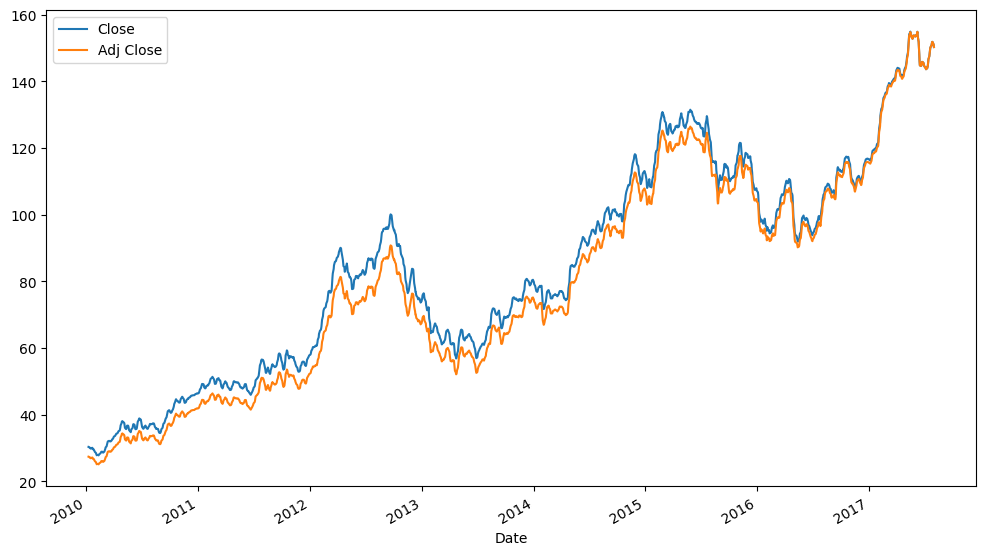

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

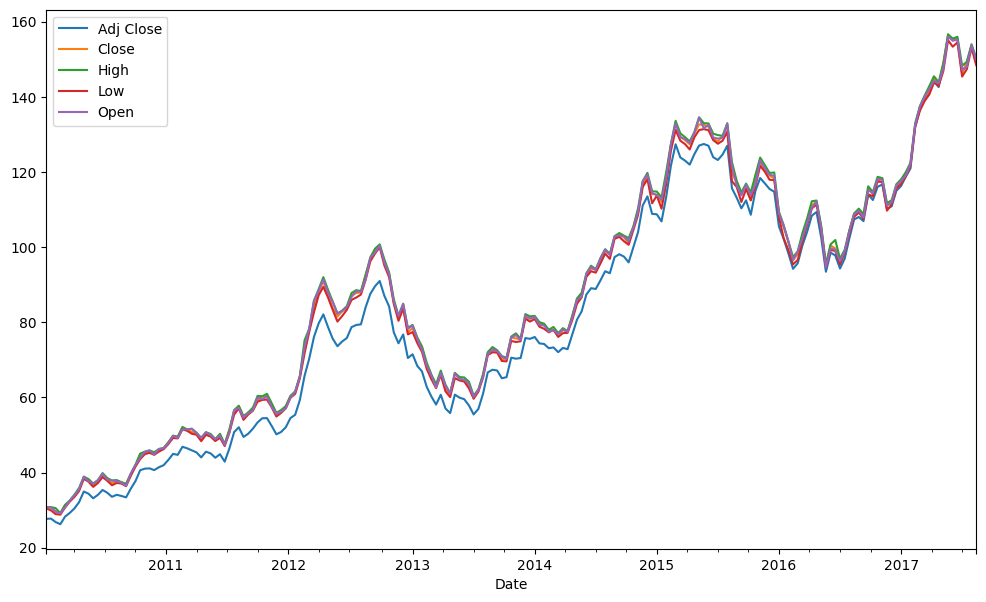

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

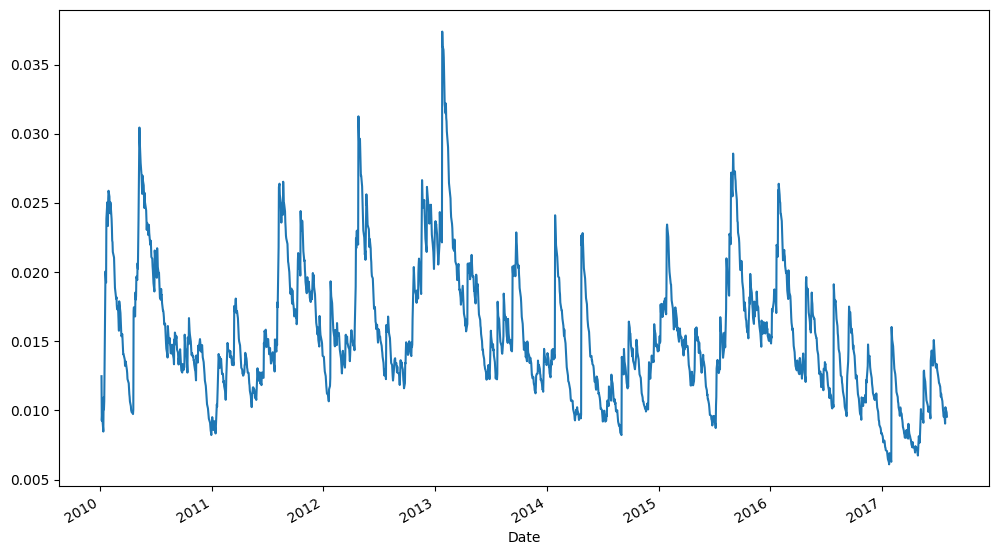

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

Conjunto de datos utlizado tomado de: [https://www.datos.gov.co/Agricultura-y-Desarrollo-Rural/Aguacate/k4ki-fcqi](https://www.datos.gov.co/Agricultura-y-Desarrollo-Rural/Aguacate/k4ki-fcqi)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
df = pd.read_csv('avocadoCOL.csv', encoding='utf-8', index_col=0)
df.columns = [c.replace("\n", " ") for c in df.columns]

# Suponiendo que df es tu DataFrame actual
# Primero, imprime los nombres actuales de las columnas para entender cómo están desplazados
print(df.columns)


print(df.columns)
print(df.head())

# Limpieza básica y conversión de tipos de datos si es necesario
# Por ejemplo, asegurándose de que 'AÑO', 'Área Sembrada (ha)', 'Área Cosechada (ha)',
# 'Producción (t)', y 'Rendimiento (t/ha)' sean del tipo correcto
df['YEAR'] = pd.to_numeric(df['AÑO'], errors='coerce')
df['Área Sembrada (ha)'] = pd.to_numeric(df['Área Sembrada (ha)'], errors='coerce')
df['Area Cosechada (ha)'] = pd.to_numeric(df['Área Cosechada (ha)'], errors='coerce')
df['Producción (t)'] = pd.to_numeric(df['Producción (t)'], errors='coerce')
df['Rendimiento (t/ha)'] = pd.to_numeric(df['Rendimiento (t/ha)'], errors='coerce')



Index(['DEPARTAMENTO', 'CÓD. MUN.', 'MUNICIPIO', 'GRUPO  DE CULTIVO',
       'SUBGRUPO  DE CULTIVO', 'CULTIVO',
       'DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO', 'AÑO', 'PERIODO',
       'Área Sembrada (ha)', 'Área Cosechada (ha)', 'Producción (t)',
       'Rendimiento (t/ha)', 'ESTADO FISICO PRODUCCION', 'NOMBRE  CIENTIFICO',
       'CICLO DE CULTIVO'],
      dtype='object')
Index(['DEPARTAMENTO', 'CÓD. MUN.', 'MUNICIPIO', 'GRUPO  DE CULTIVO',
       'SUBGRUPO  DE CULTIVO', 'CULTIVO',
       'DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO', 'AÑO', 'PERIODO',
       'Área Sembrada (ha)', 'Área Cosechada (ha)', 'Producción (t)',
       'Rendimiento (t/ha)', 'ESTADO FISICO PRODUCCION', 'NOMBRE  CIENTIFICO',
       'CICLO DE CULTIVO'],
      dtype='object')
                   DEPARTAMENTO CÓD. MUN.   MUNICIPIO GRUPO  DE CULTIVO  \
CÓD. \nDEP.                                                               
15                       BOYACA    15,114    BUSBANZA        HORTALIZAS   
25   

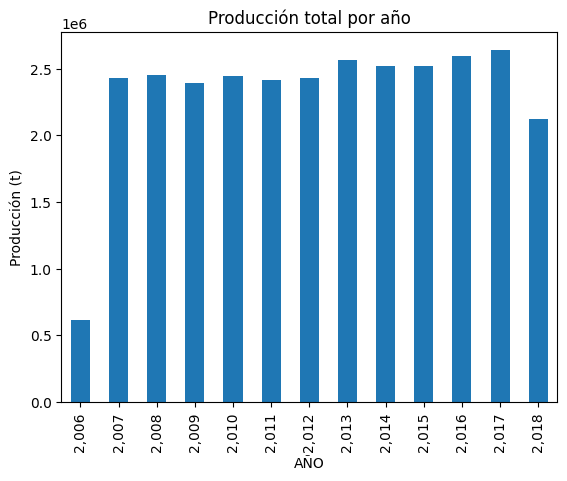

In [3]:
# 1. Producción total por año
produccion_por_año = df.groupby('AÑO')['Producción (t)'].sum()
produccion_por_año.plot(kind='bar')
plt.title('Producción total por año')
plt.ylabel('Producción (t)')
plt.show()

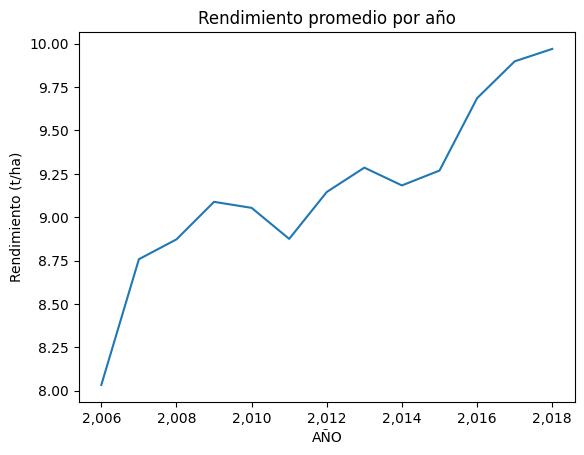

In [4]:
# 2. Rendimiento promedio (t/ha) por año
rendimiento_por_año = df.groupby('AÑO')['Rendimiento (t/ha)'].mean()
rendimiento_por_año.plot(kind='line')
plt.title('Rendimiento promedio por año')
plt.ylabel('Rendimiento (t/ha)')
plt.show()


<ipython-input-5-b0db68a1cc59>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  area_por_departamento = df.groupby('DEPARTAMENTO')[['Área Sembrada (ha)', 'Área Cosechada (ha)']].sum()


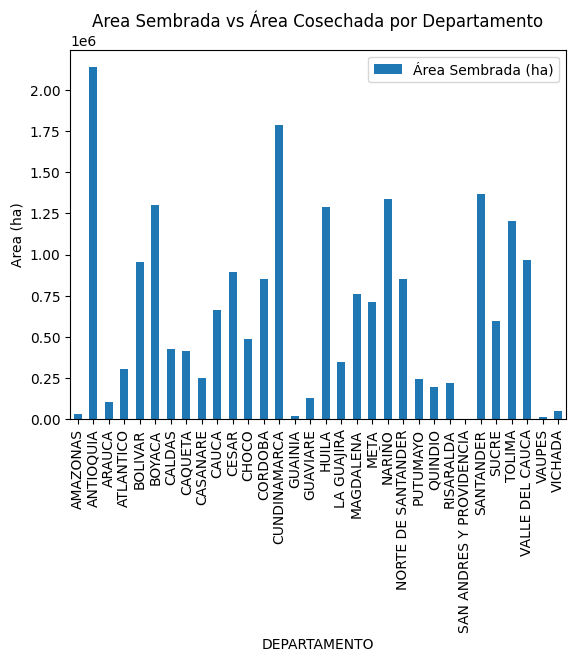

In [5]:
# 3. Comparación de área sembrada versus área cosechada por departamento
area_por_departamento = df.groupby('DEPARTAMENTO')[['Área Sembrada (ha)', 'Área Cosechada (ha)']].sum()
area_por_departamento.plot(kind='bar', stacked=True)
plt.title('Area Sembrada vs Área Cosechada por Departamento')
plt.ylabel('Area (ha)')
plt.show()

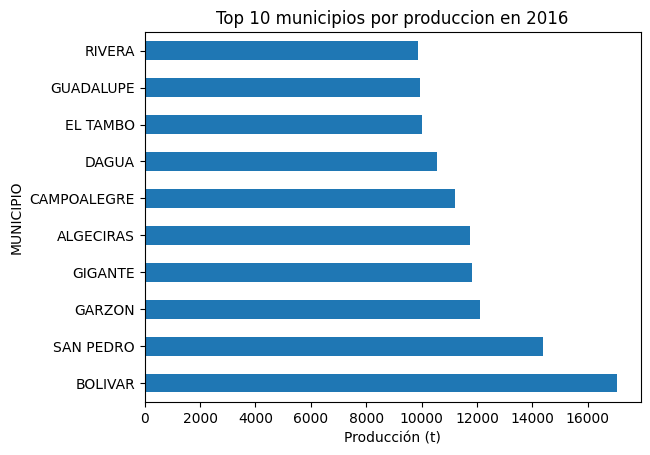

In [8]:
if not df[df['AÑO'] == '2,016'].empty:
    top_municipios = df[df['AÑO'] == "2,016"].groupby('MUNICIPIO')['Producción (t)'].sum().nlargest(10)
    top_municipios.plot(kind='barh')
    plt.title('Top 10 municipios por produccion en 2016')
    plt.xlabel('Producción (t)')
    plt.show()
else:
    print("No data available for the year 2016.")

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)

    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!